In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

import src.lstm_helper as lh
import src.time_series_helpers as th

In [2]:
!ls data/

LSTM_500_forecast.csv          sample_valid.csv
lstm_10_output_predictions.csv store_item.csv
lstm_data.csv                  test.csv
processed_train.csv            train.csv
sample_submission.csv          vcr_forecast.csv


In [66]:
# load sample valid dataset
valid_path ='data/sample_valid.csv'
valid = lh.load_data(path)
valid.shape

(46000, 3)

In [67]:
valid.head()

,store,item,actuals
date,,,
2017-10-01,1,1,21
2017-10-02,1,1,12
2017-10-03,1,1,18
2017-10-04,1,1,15
2017-10-05,1,1,20


In [68]:
# load VCR model Forecasting
vcr_path = 'data/vcr_forecast.csv'
#set datatime to index
vcr_forcast=lh.load_data(vcr_path)
vcr_forcast.shape

(46000, 1)

In [69]:
vcr_forcast.head(10)

,vcr_forecast
date,
2017-10-01,28.298917
2017-10-02,17.481383
2017-10-03,21.455338
2017-10-04,22.685883
2017-10-05,22.080135
2017-10-06,24.601014
2017-10-07,27.347777
2017-10-08,28.590096
2017-10-09,17.880181


In [73]:
# load LSTM_500_output model Forecasting
LSTM_500_output_path ='data/LSTM_500_forecast.csv'
LSTM_500_output_forecast=lh.load_data(LSTM_500_output_path)
LSTM_500_output_forecast.shape

(46000, 1)

In [76]:
LSTM_500_output_forecast.columns = ['LSTM_500_output_forecast']
LSTM_500_output_forecast.head()

,LSTM_500_output_forecast
date,
2017-10-01,19.230562
2017-10-02,19.230562
2017-10-03,19.230562
2017-10-04,19.230562
2017-10-05,19.230562


In [77]:
LSTM_10_output_path = 'data/LSTM_10_output_forecast.csv'
LSTM_10_output_forecast=lh.load_data(LSTM_10_output_path)
LSTM_10_output_forecast.shape

(46000, 1)

In [78]:
LSTM_10_output_forecast.head()

,LSTM_10_output_forecast
date,
2017-10-01,21.983830
2017-10-02,21.253641
2017-10-03,19.590227
2017-10-04,20.462664
2017-10-05,20.195715


In [79]:
df_comp = pd.concat([valid,vcr_forcast,LSTM_500_output_forecast, LSTM_10_output_forecast], axis = 'columns')

In [80]:
df_comp.shape

(46000, 6)

In [81]:
df_comp.head()

,store,item,actuals,vcr_forecast,LSTM_500_output_forecast,LSTM_10_output_forecast
date,,,,,,
2017-10-01,1,1,21,28.298917,19.230562,21.983830
2017-10-02,1,1,12,17.481383,19.230562,21.253641
2017-10-03,1,1,18,21.455338,19.230562,19.590227
2017-10-04,1,1,15,22.685883,19.230562,20.462664
2017-10-05,1,1,20,22.080135,19.230562,20.195715


In [92]:
comp_data = df_comp.iloc[:,2:]

actuals                     54.677543
vcr_forecast                55.054831
LSTM_500_output_forecast    54.059031
LSTM_10_output_forecast     52.855084
dtype: float64

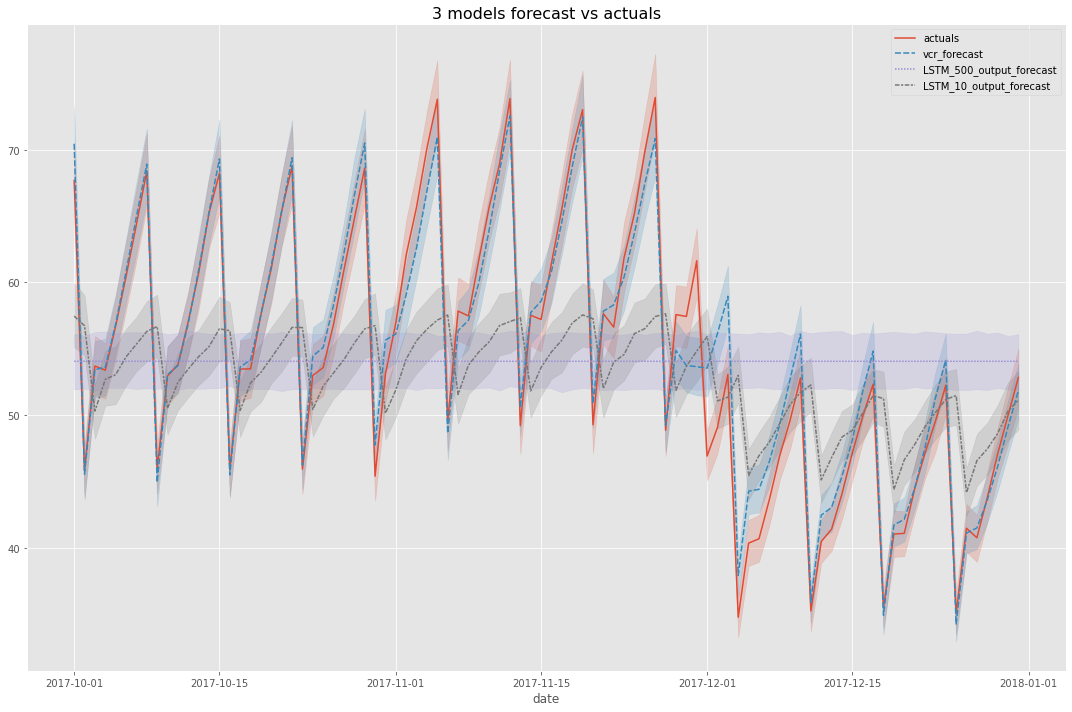

In [100]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.lineplot(data=comp_data)
ax.set_title('3 models forecast vs actuals',fontsize=16)

plt.tight_layout()
plt.savefig('images/3_models_forecast_vs_actuals.png')

In [110]:
for i in range(4):
    print(comp_data.iloc[:,i].sum())

2515167
2532522.224208033
2486715.407408
2431333.8702765


In [111]:
comp_data.sum()

actuals                     2.515167e+06
vcr_forecast                2.532522e+06
LSTM_500_output_forecast    2.486715e+06
LSTM_10_output_forecast     2.431334e+06
dtype: float64

In [118]:
rmse_lst =[th.rmse_calculate(comp_data.actuals,comp_data.iloc[:,i]) for i in range(4)]
rmse_lst

[0.0, 35.0, 35.31, 35.17]

In [169]:

df_rmses = pd.DataFrame({'names':comp_data.columns,'RMSE_or_mean':rmse_lst})

In [170]:
df_rmses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   names         4 non-null      object 
 1   RMSE_or_mean  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


In [171]:
df_rmses.iloc[0,:].shape

(2,)

In [172]:
df_rmses.iloc[0,0]='actuals_mean'
df_rmses.iloc[0,1]=valid.actuals.mean()


In [173]:
df_rmses

,names,RMSE_or_mean
0,actuals_mean,54.677543
1,vcr_forecast,35.000000
2,LSTM_500_output_forecast,35.310000
3,LSTM_10_output_forecast,35.170000


In [174]:
df_rmses

,names,RMSE_or_mean
0,actuals_mean,54.677543
1,vcr_forecast,35.000000
2,LSTM_500_output_forecast,35.310000
3,LSTM_10_output_forecast,35.170000


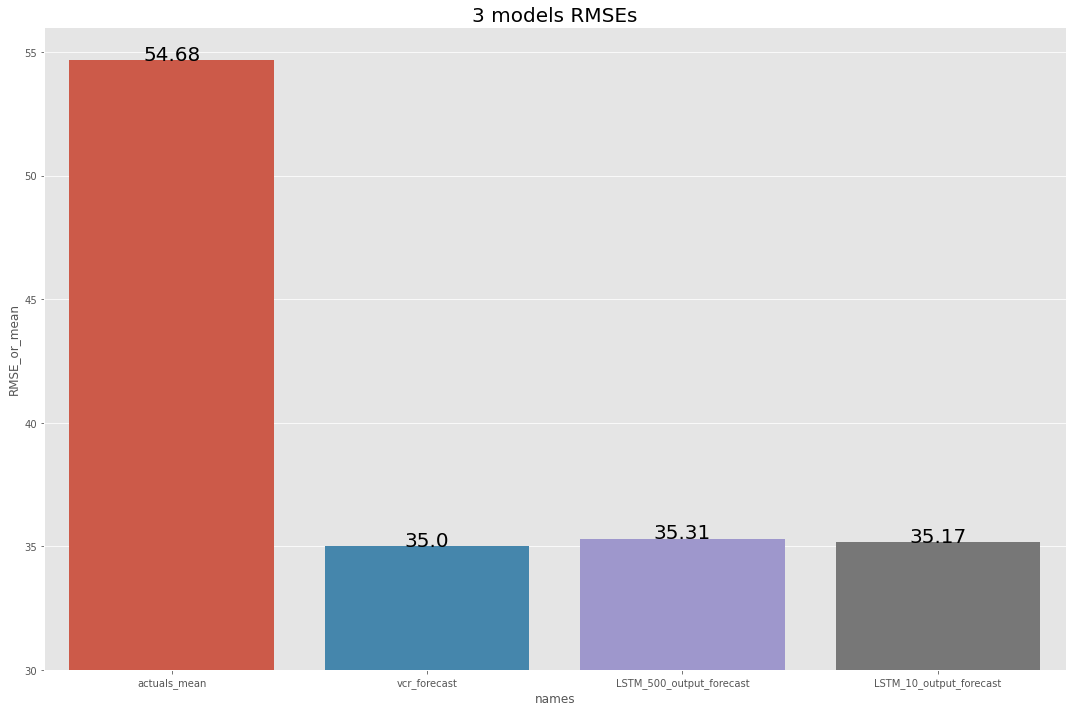

In [179]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(data=df_rmses,x="names", y="RMSE_or_mean")
ax.set_ylim(30,56)
ax.set_title('3 models RMSEs',fontsize=20)
for index, row in df_rmses.iterrows():
    ax.text(row.name,row.RMSE_or_mean, round(row.RMSE_or_mean,2), color='black', ha="center",fontsize=20)
ax.x_title(fontsize=20)
plt.tight_layout()
plt.savefig('images/3_models_RMSEs.png')

In [129]:
sns.histplot(data=penguins)

AttributeError: module 'seaborn' has no attribute 'histplot'